In [1]:
# Full name: Mai Xuan Bach
# ID: 11200489

In [2]:
 # pip install imblearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels
import re

In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
#!pip install xgboost

In [10]:
from xgboost import XGBClassifier

In [11]:
#!pip install catboost

In [12]:
from catboost import CatBoostClassifier

In [13]:
#!pip install lightgbm

In [14]:
import lightgbm as lgb

In [15]:
from lightgbm import LGBMClassifier

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

In [19]:
#!pip install scorecardpy

In [20]:
import scorecardpy as sc

In [21]:
import mlxtend

In [22]:
pd.set_option('display.max_columns', None)  

In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
train = pd.read_csv('./AmExpressCodeLab/train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [25]:
train["credit_card_default"].value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

In [26]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [27]:
# check shape and length
print(df.shape)

(30000, 19)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(

## cat feats - num feats

In [29]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat_feats))
print("no of num feats: ", len(num_feats))

no of cat feats:  6
no of num feats:  13


In [30]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [31]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [32]:
df.duplicated().sum()

0

## isnull()

In [33]:
df.isnull().sum().sort_values(ascending=False).head(10)

no_of_children             502
owns_car                   369
no_of_days_employed        315
yearly_debt_payments        62
total_family_members        56
migrant_worker              53
credit_score                 6
customer_id                  0
default_in_last_6months      0
prev_defaults                0
dtype: int64

## Xem biến trạng thái default

In [34]:
df["credit_card_default"].value_counts()

0    27537
1     2463
Name: credit_card_default, dtype: int64

In [35]:
df["credit_card_default"].value_counts(normalize=True)

0    0.9179
1    0.0821
Name: credit_card_default, dtype: float64

## Fillnan: Categorical features

In [36]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [37]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: customer_id, Length: 30000, dtype: float64


Column Name: name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: name, Length: 3514, dtype: float64


Column Name: gender
F      0.657700
M      0.342267
XNA    0.000033
Name: gender, dtype: float64


Column Name: owns_car
N    0.660862
Y    0.339138
Name: owns_car, dtype: float64


Column Name: owns_house
Y    0.6962
N    0.3038
Name: owns_house, dtype: float64


Column Name: occupation_ty

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

### Gender

In [38]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [39]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

F    19731
M    10269
Name: gender, dtype: int64

### Owns car

In [40]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

In [41]:
df["owns_car"].value_counts(normalize=True)

N    0.665033
Y    0.334967
Name: owns_car, dtype: float64

In [42]:
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

## Fillnan:  Numerical features

In [43]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
net_yearly_income         0
credit_limit              0
credit_limit_used(%)      0
dtype: int64

### no_of_days_employed

In [44]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [45]:
df.no_of_days_employed.isna().sum()

0

### yearly_debt_payments

In [46]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [47]:
df['yearly_debt_payments'].isna().sum()

0

In [48]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children          502
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
dtype: int64

### migrant_worker

In [49]:
df['migrant_worker'].mode()

0    0.0
dtype: float64

In [50]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

0

### total_family_members

In [51]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

0

In [52]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

no_of_children         502
credit_score             6
age                      0
net_yearly_income        0
no_of_days_employed      0
dtype: int64

### no_of_children

In [53]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

### credit_score

In [54]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [55]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [56]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

## Concentrated EDA

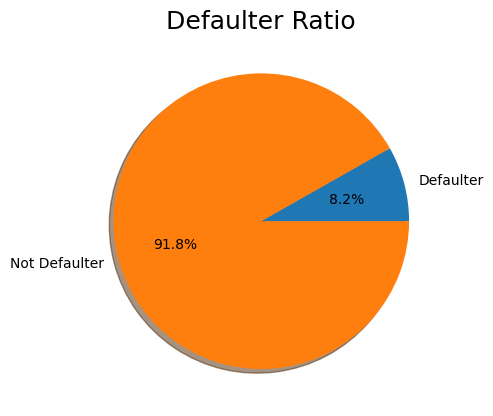

In [57]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


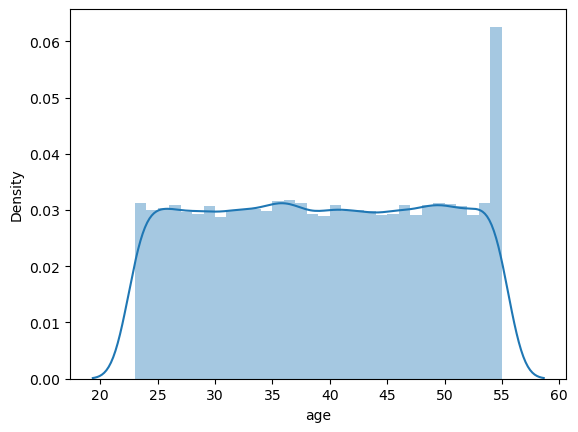

In [58]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


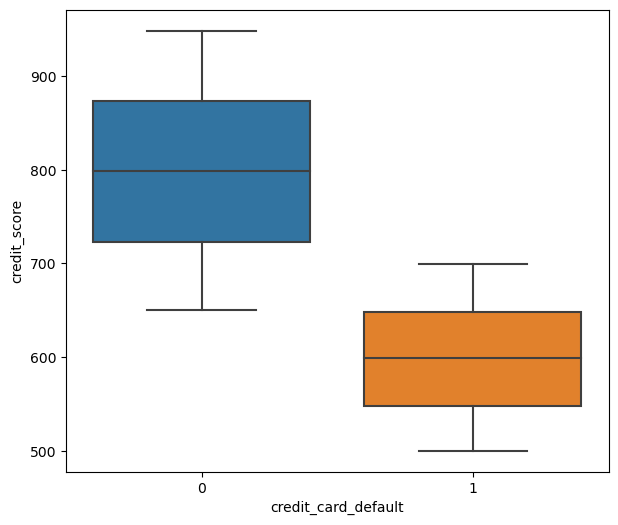

In [59]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(df['credit_card_default'], df['credit_score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


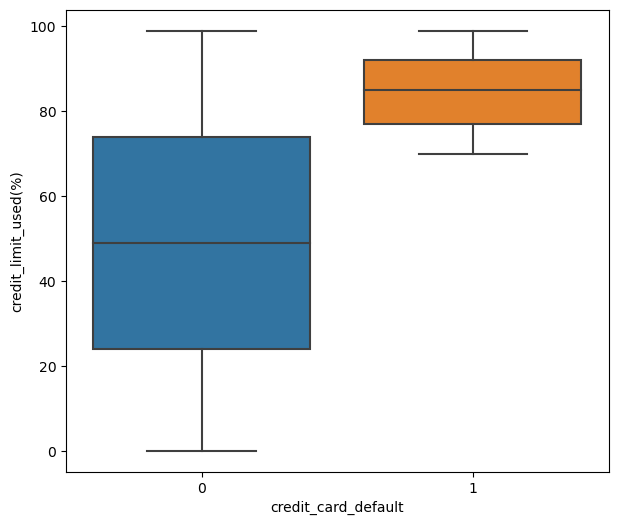

In [60]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(df['credit_card_default'], df['credit_limit_used(%)'])
plt.show()

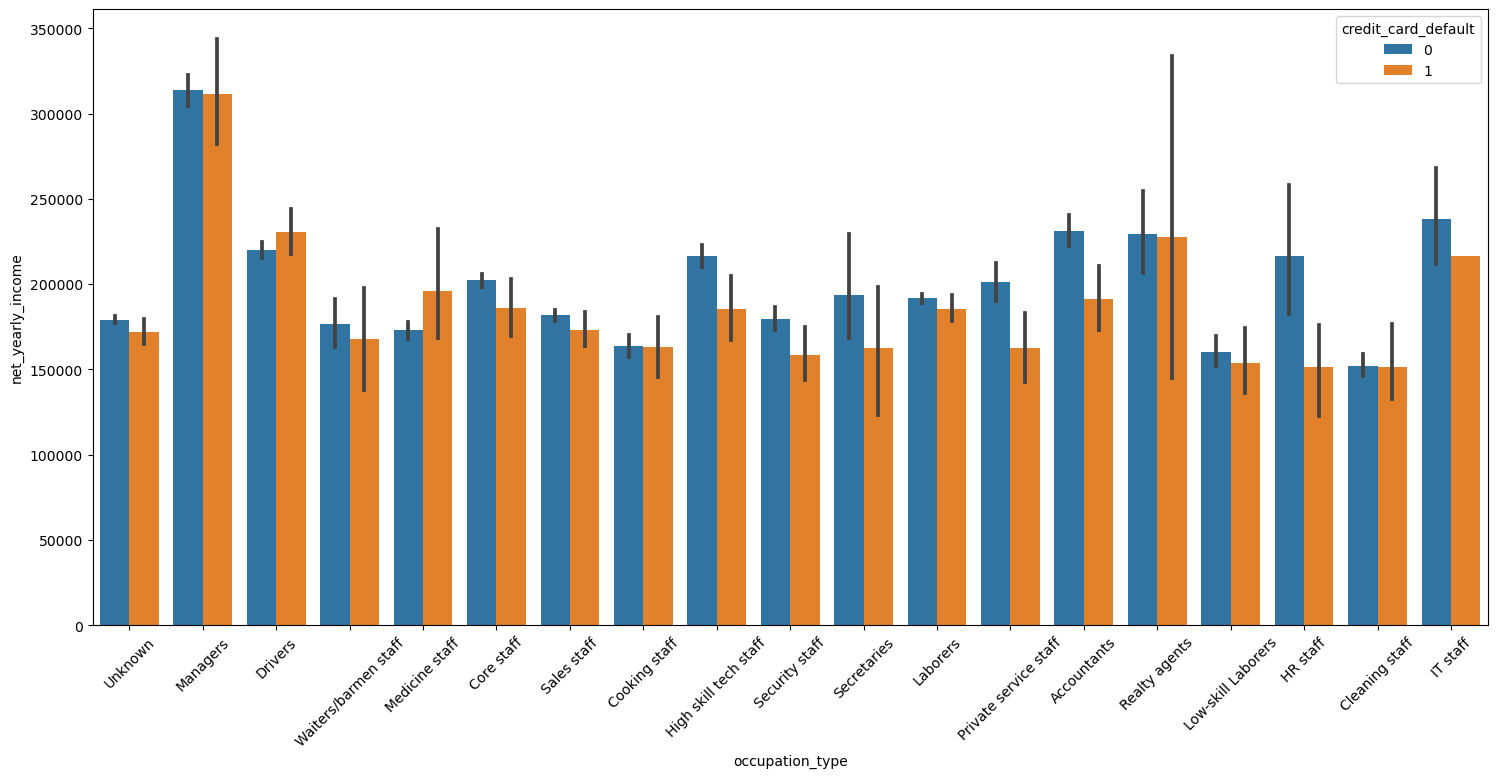

In [61]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


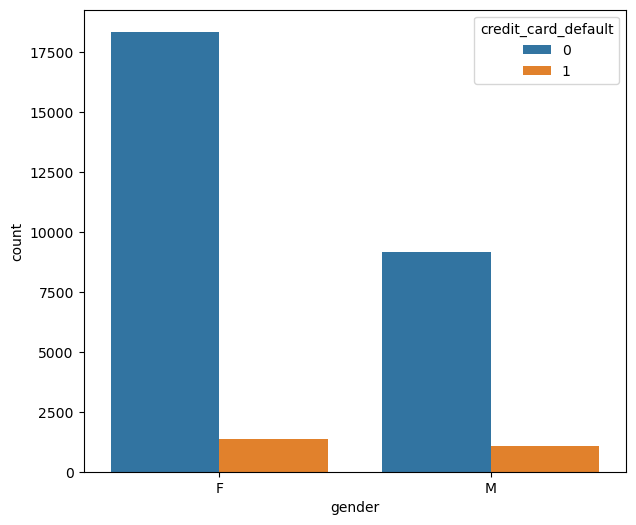

In [62]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(df['gender'], hue=df['credit_card_default'])
plt.show()

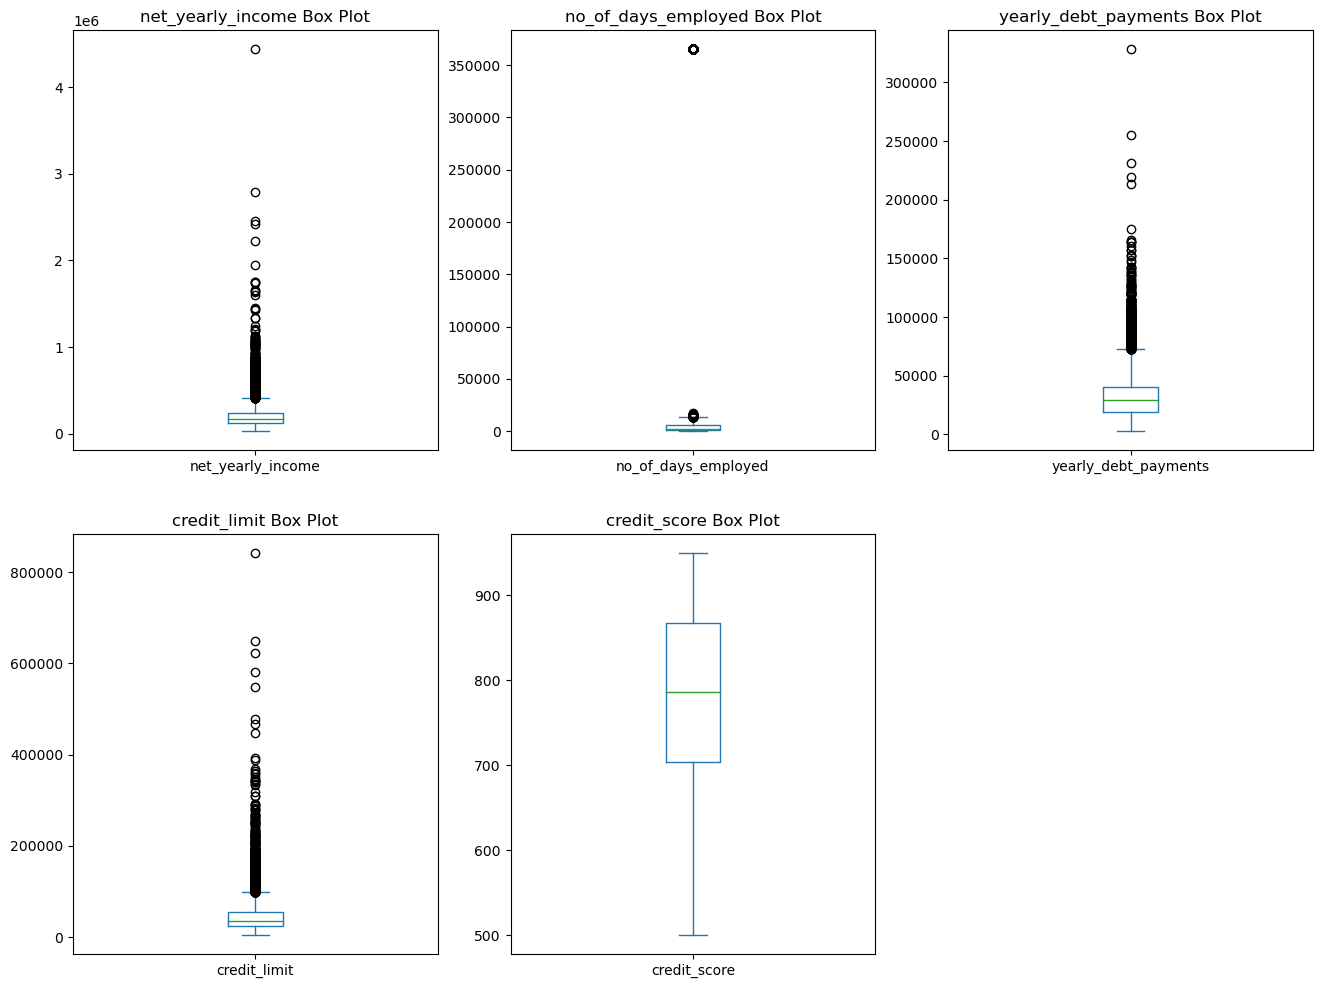

In [63]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# Data Processing

## Drop columns which have IV < 0.02

In [64]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [65]:
final_iv, IV = data_vars(df.drop(columns =["customer_id", "name", 'credit_card_default']), df["credit_card_default"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,23,39,15426,1268,0.082199,14158,0.917801,0.514819,0.514145,0.001311,0.000002
1,age,40,55,14574,1195,0.081995,13379,0.918005,0.485181,0.485855,-0.001390,0.000002
2,gender,F,F,19731,1378,0.069839,18353,0.930161,0.559480,0.666485,-0.175009,0.048503
3,gender,M,M,10269,1085,0.105658,9184,0.894342,0.440520,0.333515,0.278268,0.048503
4,owns_car,N,N,19951,1709,0.085660,18242,0.914340,0.693869,0.662454,0.046332,0.004524
5,owns_car,Y,Y,10049,754,0.075032,9295,0.924968,0.306131,0.337546,-0.097689,0.004524
6,owns_house,N,N,9114,757,0.083059,8357,0.916941,0.307349,0.303483,0.012659,0.000070
7,owns_house,Y,Y,20886,1706,0.081682,19180,0.918318,0.692651,0.696517,-0.005566,0.000070
8,no_of_children,0.0,1.0,27010,2196,0.081303,24814,0.918697,0.891596,0.901115,-0.010620,0.000976
9,no_of_children,2.0,9.0,2990,267,0.089298,2723,0.910702,0.108404,0.098885,0.091910,0.000976


In [67]:
IV.sort_values('IV')

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [68]:
IV.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [69]:
IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
       'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker'], dtype=object)

**We will drop some low (< 0.02) IV columns**

In [70]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

In [71]:
#dt_s = sc.var_filter(df, y="credit_card_default",return_rm_reason=True)

In [72]:
#dt_s["dt"]

## WOE binning

[INFO] creating woe binning ...
Binning on 30000 rows and 17 columns in 00:00:13


{'credit_score': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>}

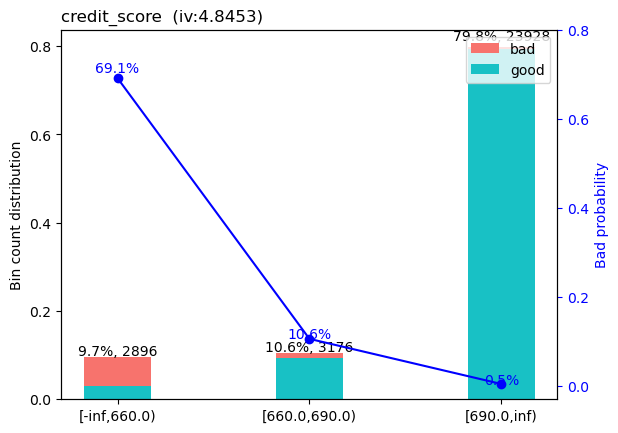

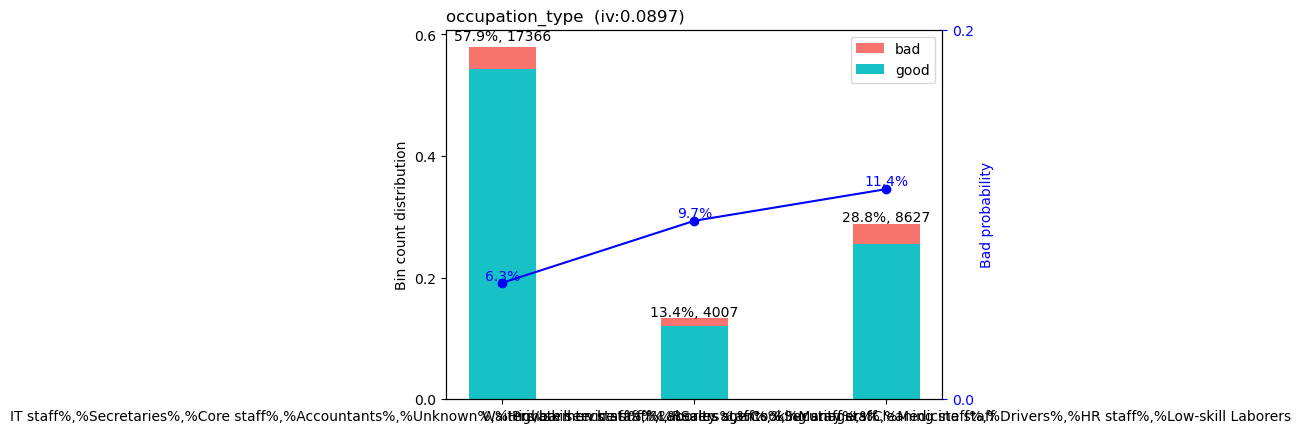

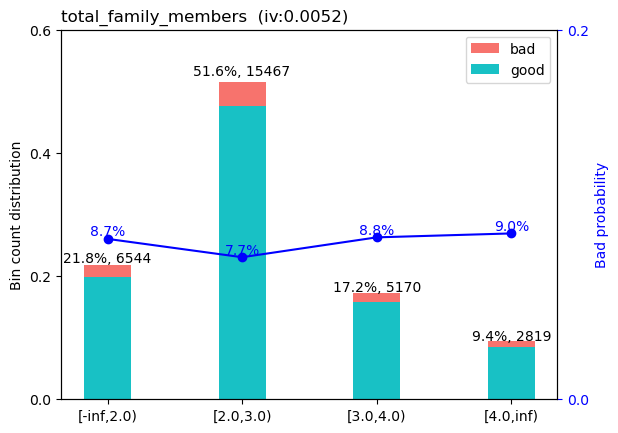

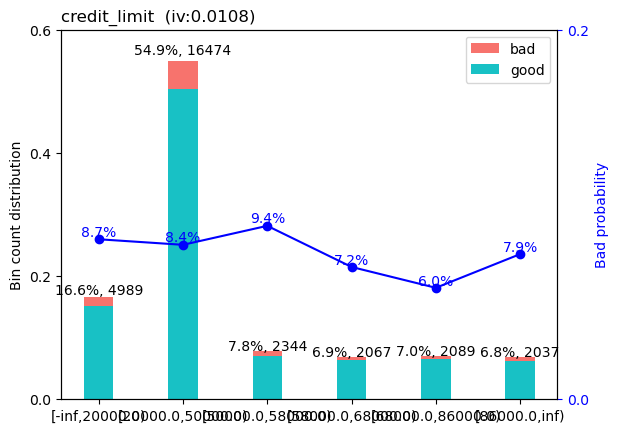

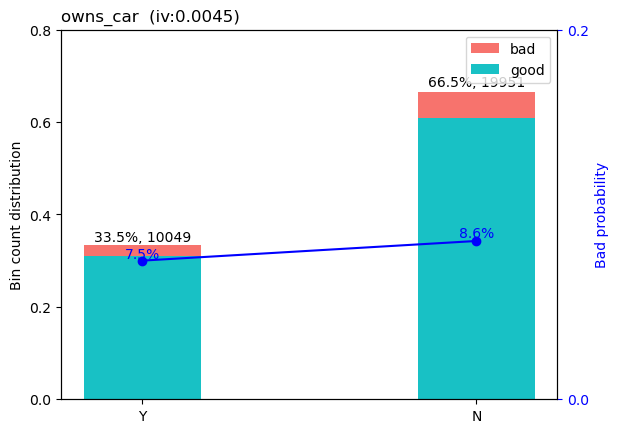

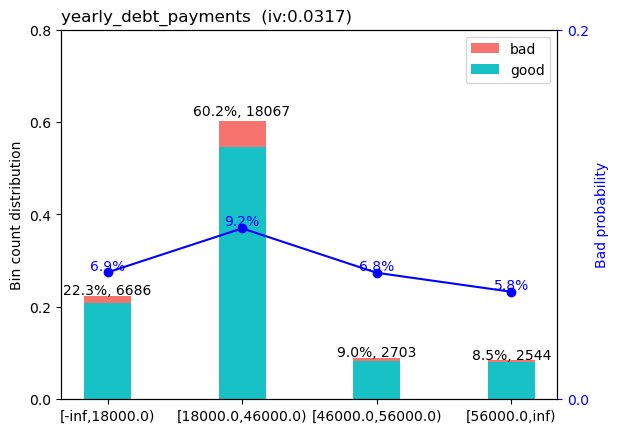

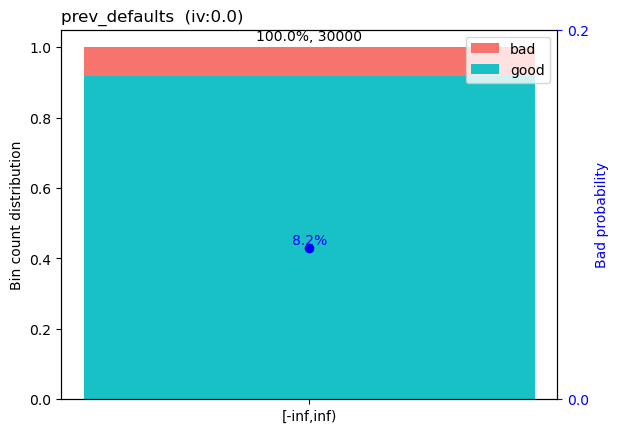

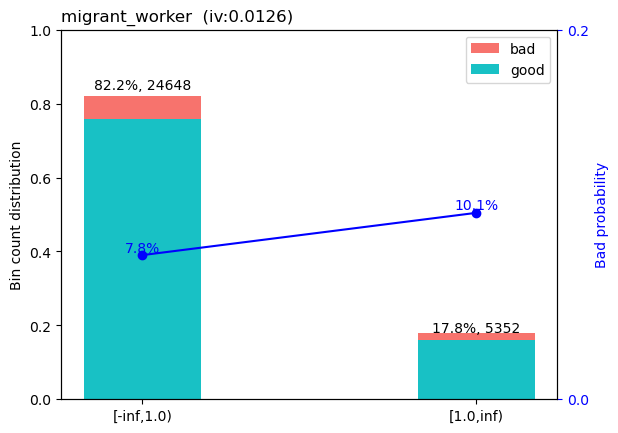

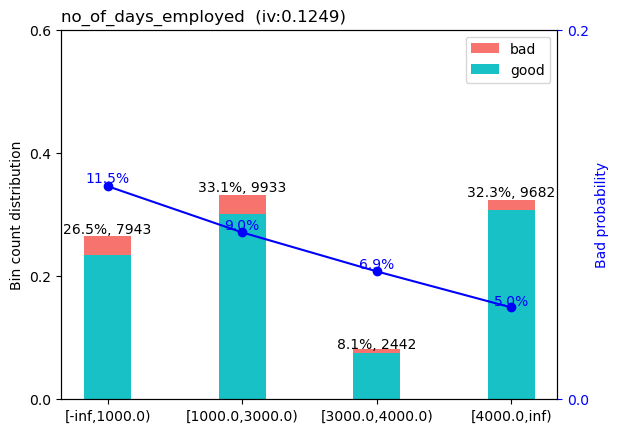

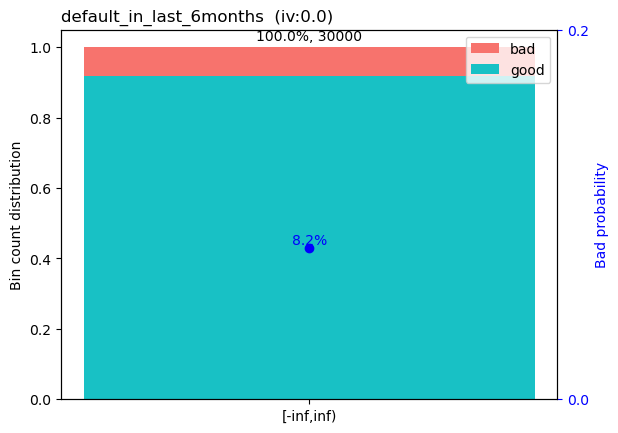

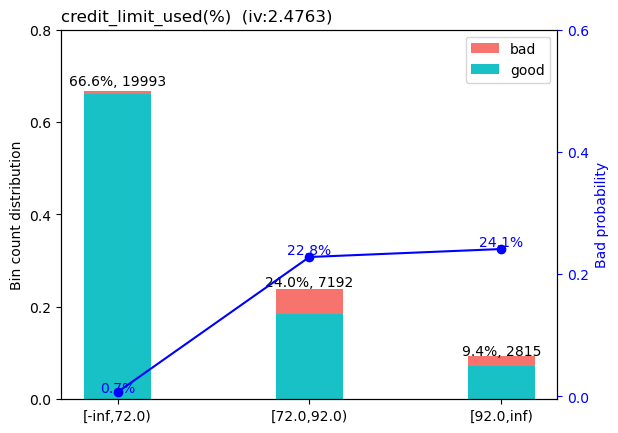

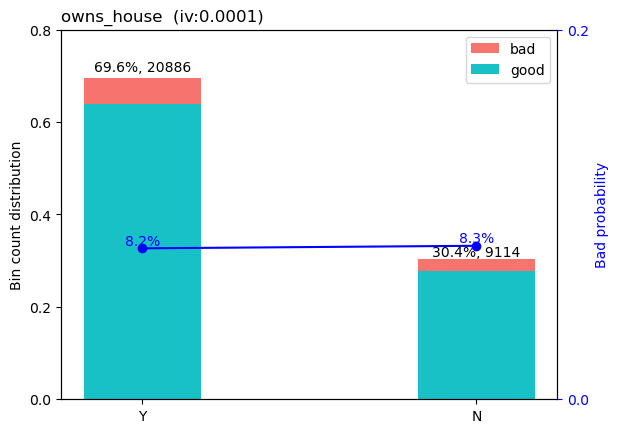

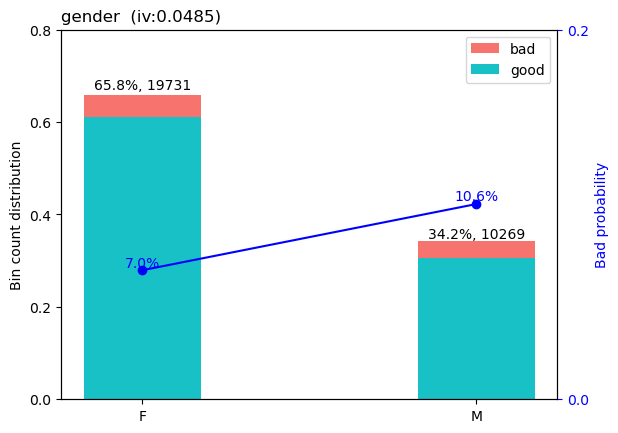

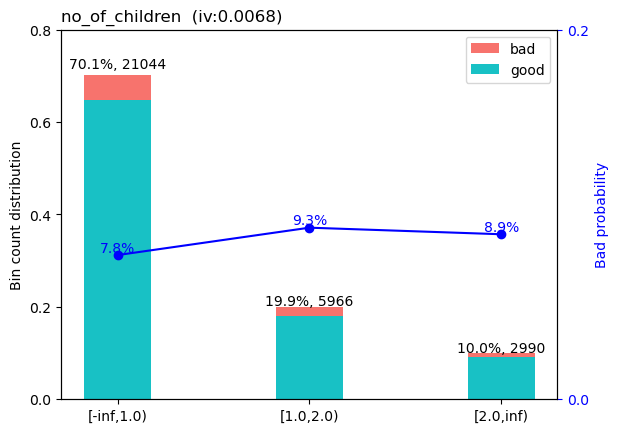

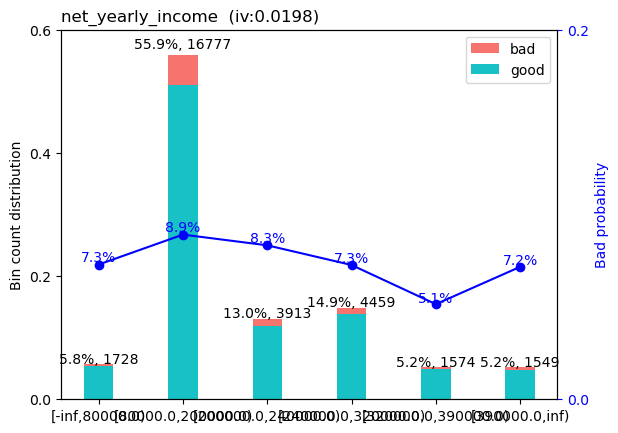

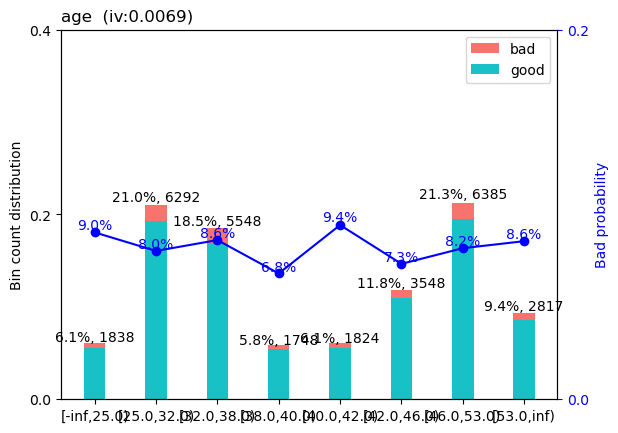

In [73]:
# woe binning ------
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [74]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,no_of_days_employed_woe,default_in_last_6months_woe,credit_limit_used(%)_woe,credit_score_woe,occupation_type_woe,total_family_members_woe,owns_house_woe,credit_limit_woe,owns_car_woe,gender_woe,no_of_children_woe,yearly_debt_payments_woe,net_yearly_income_woe,prev_defaults_woe,migrant_worker_woe,age_woe
0,1,0.376652,0.0,1.195478,3.220347,-0.284480,0.060765,-0.005566,0.058156,0.046332,-0.175009,-0.055311,0.130535,0.089601,0.0,0.226851,-0.004599
1,0,0.104234,0.0,-2.518964,-2.851316,0.360785,-0.071457,-0.005566,0.019562,0.046332,0.278268,-0.055311,-0.193449,0.089601,0.0,-0.055429,-0.024660
3,0,-0.537050,0.0,-2.518964,-2.851316,-0.284480,-0.071457,-0.005566,0.019562,0.046332,-0.175009,-0.055311,0.130535,0.089601,0.0,-0.055429,-0.202448
4,0,0.104234,0.0,1.195478,-2.851316,-0.284480,0.060765,-0.005566,0.146722,-0.097689,0.278268,-0.055311,0.130535,-0.499943,0.0,-0.055429,-0.004599
6,0,-0.537050,0.0,-2.518964,-2.851316,-0.284480,0.071114,-0.005566,0.019562,0.046332,0.278268,0.134941,-0.196714,-0.132349,0.0,-0.055429,-0.202448
7,0,0.104234,0.0,1.195478,-2.851316,-0.284480,0.071114,-0.005566,0.019562,-0.097689,-0.175009,0.134941,0.130535,-0.132349,0.0,-0.055429,-0.004599
8,0,-0.537050,0.0,-2.518964,-2.851316,0.360785,-0.071457,-0.005566,-0.148197,0.046332,-0.175009,-0.055311,0.130535,0.015976,0.0,-0.055429,0.151903
11,0,0.376652,0.0,-2.518964,-2.851316,0.178346,0.071114,0.012659,0.019562,-0.097689,0.278268,0.134941,0.130535,0.089601,0.0,-0.055429,-0.004599
13,0,0.104234,0.0,-2.518964,-2.851316,0.178346,-0.071457,0.012659,0.019562,-0.097689,-0.175009,-0.055311,-0.370193,0.089601,0.0,-0.055429,-0.004599
14,0,-0.537050,0.0,-2.518964,-2.851316,-0.284480,-0.071457,-0.005566,-0.048106,-0.097689,0.278268,-0.055311,-0.370193,-0.499943,0.0,-0.055429,-0.123203


In [75]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## Encoding

In [76]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [77]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44609,1,365250.0,60,858.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
44264,1,365241.0,81,667.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
33556,1,1882.0,32,690.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
28050,0,365244.0,65,721.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Split dataset

In [78]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [79]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5389,1,1206.0,16,711.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8704,1,4040.0,18,761.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37747,0,96.0,51,854.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27346,0,5326.0,92,700.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
y_train

26658    0
5389     0
8704     0
37747    0
27346    0
        ..
34093    0
823      0
32715    0
14006    0
21152    0
Name: credit_card_default, Length: 21000, dtype: int64

In [81]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [82]:
X_train_woe.head()

,no_of_days_employed_woe,default_in_last_6months_woe,credit_limit_used(%)_woe,credit_score_woe,occupation_type_woe,total_family_members_woe,owns_house_woe,credit_limit_woe,owns_car_woe,gender_woe,no_of_children_woe,yearly_debt_payments_woe,net_yearly_income_woe,prev_defaults_woe,migrant_worker_woe,age_woe
42789,-0.184807,0.0,-2.518964,-2.851316,-0.284480,-0.071457,-0.005566,0.019562,0.046332,-0.175009,-0.055311,0.130535,0.089601,0.0,-0.055429,0.052665
39225,0.104234,0.0,-2.518964,-2.851316,0.360785,0.071114,-0.005566,0.019562,0.046332,0.278268,0.134941,-0.370193,0.089601,0.0,0.226851,0.044954
30331,0.104234,0.0,-2.518964,-2.851316,-0.284480,-0.071457,-0.005566,0.146722,-0.097689,-0.175009,-0.055311,0.130535,-0.499943,0.0,-0.055429,-0.024660
22975,0.376652,0.0,-2.518964,-2.851316,-0.284480,0.060765,-0.005566,0.019562,0.046332,0.278268,-0.055311,0.130535,0.089601,0.0,-0.055429,-0.024660
21589,-0.184807,0.0,1.195478,-2.851316,0.360785,0.071114,-0.005566,-0.048106,-0.097689,0.278268,0.134941,-0.370193,-0.147328,0.0,-0.055429,0.044954


In [83]:
y_woe

0        1
1        0
3        0
4        0
6        0
        ..
45520    0
45521    0
45524    0
45526    0
45527    0
Name: credit_card_default, Length: 30000, dtype: int64

## Scaling data

In [84]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Data Imbalancing Handling

In [85]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [86]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [87]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: credit_card_default, dtype: float64

# Sử dụng mô hình Logit trong chấm điểm tín dụng:

## Chạy mô hình logit cho tập train cho dữ liệu ban đầu

In [89]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit()

         Current function value: 0.098695
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Sun, 19 Mar 2023   Pseudo R-squ.:                  0.8576
Time:                         14:11:39   Log-Likelihood:                -3804.9
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.1955      0.072     -2.731      0.006      -0.336      -0.055
no_of_days_employed                 -0.3089      0.115     -2.676      0.007      -0.535      -0.083
credit_limit_used(%)                 9.2967      0.219     42.504      0.000       8.868       9.725
credit_score                       -26.3302      0.615    -42.825      0.000     -27.535     -25.125
default_in_last_6months            216.5010   1.34e+04      0.016      0.987   -2.61e+04    2.65e+04
occupation_Accountants               3.8706      0.315     12.299      0.000       3.254       4.487
occupation_Cleaning staff            4.3175      0.348     12.407      0.000       3.635       5.000
occupation_Cooking staff             4.5699      0.331     13.791      0.000       3.920       5.219
occupation_Core staff                4.1222      0.286     14.414      0.000       3.562       4.683
occupation_Drivers                   4.1146      0.283     14.552      0.000       3.560       4.669
occupation_HR staff                  1.1312      1.233      0.918      0.359      -1.285       3.547
occupation_High skill tech staff     2.8968      0.318      9.113      0.000       2.274       3.520
occupation_IT staff                 -3.2122      3.654     -0.879      0.379     -10.374       3.949
occupation_Laborers                  3.9506      0.271     14.559      0.000       3.419       4.482
occupation_Low-skill Laborers        3.9416      0.412      9.569      0.000       3.134       4.749
occupation_Managers                  3.5844      0.290     12.379      0.000       3.017       4.152
occupation_Medicine staff            3.4496      0.333     10.346      0.000       2.796       4.103
occupation_Private service staff     2.4504      0.430      5.695      0.000       1.607       3.294
occupation_Realty agents             2.4885      0.792      3.143      0.002       0.937       4.040
occupation_Sales staff               3.9199      0.280     14.009      0.000       3.371       4.468
occupation_Secretaries               2.2090      0.592      3.729      0.000       1.048       3.370
occupation_Security staff            3.0221      0.347      8.710      0.000       2.342       3.702
occupation_Unknown                   3.5768      0.276     12.957      0.000       3.036       4.118
occupation_Waiters/barmen staff      5.1816      0.430     12.037      0.000       4.338       6.025
====================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Chạy mô hình logit cho tập train cho dữ liệu sử dụng WOE

C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


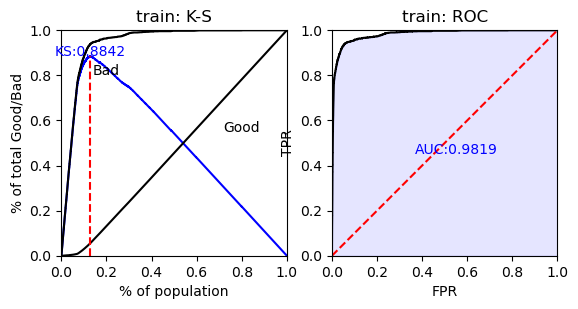

C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


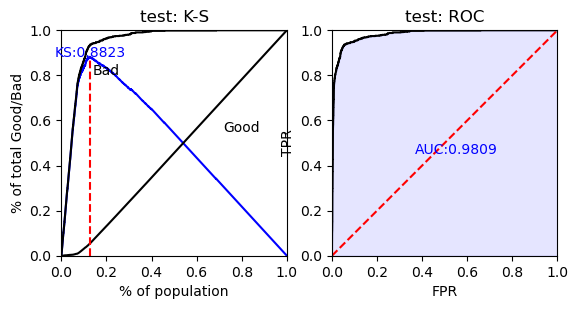

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [91]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [92]:
score

,no_of_days_employed_points,credit_limit_used(%)_points,credit_score_points,occupation_type_points,credit_limit_points,owns_car_points,gender_points,yearly_debt_payments_points,age_points,score
0,-26.0,-88.0,-234.0,9.0,-3.0,-7.0,7.0,-9.0,0.0,213.0
1,-7.0,185.0,207.0,-11.0,-1.0,-7.0,-11.0,14.0,2.0,935.0
3,37.0,185.0,207.0,9.0,-1.0,-7.0,7.0,-9.0,14.0,1006.0
4,-7.0,-88.0,207.0,9.0,-8.0,15.0,-11.0,-9.0,0.0,672.0
6,37.0,185.0,207.0,9.0,-1.0,-7.0,-11.0,14.0,14.0,1011.0
...,...,...,...,...,...,...,...,...,...,...
45520,-7.0,-88.0,207.0,-11.0,-1.0,15.0,-11.0,14.0,0.0,682.0
45521,37.0,185.0,207.0,9.0,-1.0,-7.0,7.0,-9.0,0.0,992.0
45524,-26.0,185.0,-21.0,9.0,3.0,-7.0,7.0,-9.0,2.0,707.0
45526,-7.0,-93.0,207.0,-11.0,-1.0,15.0,-11.0,-9.0,-4.0,650.0


(array([ 1460.,   673.,   375.,  1191.,   441.,  5180.,  3433.,   324.,
        12158.,  4765.]),
 array([ 159. ,  251.4,  343.8,  436.2,  528.6,  621. ,  713.4,  805.8,
         898.2,  990.6, 1083. ]),
 <BarContainer object of 10 artists>)

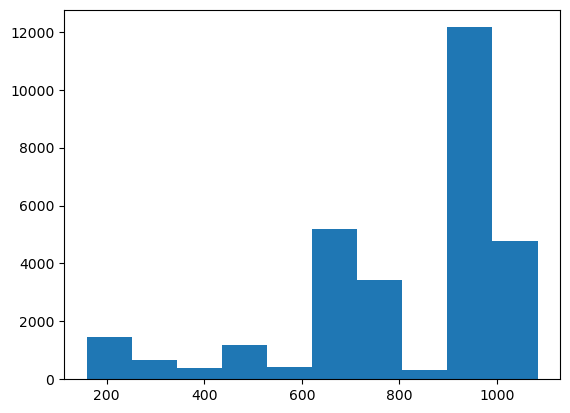

In [93]:
plt.hist(score["score"])

# Sử dụng các mô hình khác nhau cho Credit Risk Analysis

In [94]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)
    
    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)
    

In [95]:
y_test

11858    0
22651    0
38925    0
2917     0
18012    0
        ..
37539    0
17978    1
5227     0
3994     0
8471     0
Name: credit_card_default, Length: 9000, dtype: int64

## Logisitc Regression

In [96]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [97]:
# prediction
evaluation(logreg)

[[18241  1035]
 [  617 18659]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.71487860551981
F1_Score of TRAIN data: 95.7143747883949
[[7799  462]
 [  20  719]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.64444444444445
F1_Score of TEST data: 85.9491604477612
RMSE:  0.23142073276946376
ROC AUC score:  0.9585054838924735


## Decision Tree

In [98]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8051  210]
 [  93  646]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.87      0.81       739

    accuracy                           0.97      9000
   macro avg       0.87      0.92      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.63333333333334
F1_Score of TEST data: 89.57806846486707
RMSE:  0.1834847859269718
ROC AUC score:  0.9243668056320199


## Random Forest

In [100]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [101]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8016  245]
 [  70  669]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.91      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.90      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.5
F1_Score of TEST data: 89.50838979096383
RMSE:  0.18708286933869708
ROC AUC score:  0.9378099877163822


## CatBoost

In [102]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5821837	total: 185ms	remaining: 3m 5s
1:	learn: 0.4555874	total: 206ms	remaining: 1m 42s
2:	learn: 0.3595330	total: 223ms	remaining: 1m 14s
3:	learn: 0.3106791	total: 239ms	remaining: 59.6s
4:	learn: 0.2697032	total: 256ms	remaining: 50.9s
5:	learn: 0.2387671	total: 271ms	remaining: 44.9s
6:	learn: 0.1946611	total: 287ms	remaining: 40.7s
7:	learn: 0.1764069	total: 302ms	remaining: 37.4s
8:	learn: 0.1538569	total: 317ms	remaining: 34.9s
9:	learn: 0.1413220	total: 331ms	remaining: 32.8s
10:	learn: 0.1257604	total: 346ms	remaining: 31.1s
11:	learn: 0.1140674	total: 361ms	remaining: 29.7s
12:	learn: 0.1040012	total: 376ms	remaining: 28.6s
13:	learn: 0.0966850	total: 393ms	remaining: 27.7s
14:	learn: 0.0912453	total: 408ms	remaining: 26.8s
15:	learn: 0.0879683	total: 423ms	remaining: 26s
16:	learn: 0.0846553	total: 440ms	remaining: 25.5s
17:	learn: 0.0829259	total: 457ms	remaining: 24.9s
18:	learn: 0.0805997	total: 472ms	remaining: 24.3s
19:	learn: 

169:	learn: 0.0534869	total: 2.71s	remaining: 13.3s
170:	learn: 0.0533883	total: 2.73s	remaining: 13.2s
171:	learn: 0.0533250	total: 2.74s	remaining: 13.2s
172:	learn: 0.0532173	total: 2.76s	remaining: 13.2s
173:	learn: 0.0531326	total: 2.77s	remaining: 13.2s
174:	learn: 0.0530758	total: 2.79s	remaining: 13.1s
175:	learn: 0.0529943	total: 2.8s	remaining: 13.1s
176:	learn: 0.0529099	total: 2.81s	remaining: 13.1s
177:	learn: 0.0527805	total: 2.83s	remaining: 13.1s
178:	learn: 0.0527164	total: 2.84s	remaining: 13s
179:	learn: 0.0526905	total: 2.86s	remaining: 13s
180:	learn: 0.0525573	total: 2.87s	remaining: 13s
181:	learn: 0.0524762	total: 2.88s	remaining: 13s
182:	learn: 0.0524641	total: 2.9s	remaining: 12.9s
183:	learn: 0.0523757	total: 2.91s	remaining: 12.9s
184:	learn: 0.0523009	total: 2.93s	remaining: 12.9s
185:	learn: 0.0522405	total: 2.94s	remaining: 12.9s
186:	learn: 0.0521271	total: 2.96s	remaining: 12.9s
187:	learn: 0.0520616	total: 2.97s	remaining: 12.8s
188:	learn: 0.0520000	

329:	learn: 0.0428378	total: 5.02s	remaining: 10.2s
330:	learn: 0.0428025	total: 5.03s	remaining: 10.2s
331:	learn: 0.0426616	total: 5.05s	remaining: 10.2s
332:	learn: 0.0426049	total: 5.06s	remaining: 10.1s
333:	learn: 0.0425386	total: 5.08s	remaining: 10.1s
334:	learn: 0.0424753	total: 5.09s	remaining: 10.1s
335:	learn: 0.0424319	total: 5.1s	remaining: 10.1s
336:	learn: 0.0423872	total: 5.12s	remaining: 10.1s
337:	learn: 0.0423542	total: 5.13s	remaining: 10s
338:	learn: 0.0423177	total: 5.14s	remaining: 10s
339:	learn: 0.0422524	total: 5.16s	remaining: 10s
340:	learn: 0.0422209	total: 5.17s	remaining: 9.99s
341:	learn: 0.0421968	total: 5.19s	remaining: 9.98s
342:	learn: 0.0421450	total: 5.2s	remaining: 9.96s
343:	learn: 0.0420881	total: 5.21s	remaining: 9.95s
344:	learn: 0.0419955	total: 5.23s	remaining: 9.93s
345:	learn: 0.0418765	total: 5.24s	remaining: 9.91s
346:	learn: 0.0417735	total: 5.26s	remaining: 9.9s
347:	learn: 0.0417051	total: 5.27s	remaining: 9.88s
348:	learn: 0.0416443

502:	learn: 0.0336295	total: 7.53s	remaining: 7.44s
503:	learn: 0.0336064	total: 7.54s	remaining: 7.42s
504:	learn: 0.0335915	total: 7.56s	remaining: 7.41s
505:	learn: 0.0335445	total: 7.57s	remaining: 7.39s
506:	learn: 0.0335263	total: 7.59s	remaining: 7.38s
507:	learn: 0.0334499	total: 7.6s	remaining: 7.36s
508:	learn: 0.0334200	total: 7.62s	remaining: 7.35s
509:	learn: 0.0333930	total: 7.63s	remaining: 7.33s
510:	learn: 0.0333535	total: 7.65s	remaining: 7.32s
511:	learn: 0.0333288	total: 7.66s	remaining: 7.3s
512:	learn: 0.0332780	total: 7.67s	remaining: 7.29s
513:	learn: 0.0332611	total: 7.69s	remaining: 7.27s
514:	learn: 0.0332277	total: 7.7s	remaining: 7.25s
515:	learn: 0.0332057	total: 7.71s	remaining: 7.24s
516:	learn: 0.0331641	total: 7.73s	remaining: 7.22s
517:	learn: 0.0331222	total: 7.74s	remaining: 7.2s
518:	learn: 0.0330936	total: 7.75s	remaining: 7.19s
519:	learn: 0.0330648	total: 7.77s	remaining: 7.17s
520:	learn: 0.0330144	total: 7.78s	remaining: 7.16s
521:	learn: 0.03

664:	learn: 0.0285446	total: 9.83s	remaining: 4.95s
665:	learn: 0.0285137	total: 9.84s	remaining: 4.94s
666:	learn: 0.0284816	total: 9.86s	remaining: 4.92s
667:	learn: 0.0284539	total: 9.87s	remaining: 4.91s
668:	learn: 0.0284355	total: 9.89s	remaining: 4.89s
669:	learn: 0.0284076	total: 9.9s	remaining: 4.88s
670:	learn: 0.0283864	total: 9.92s	remaining: 4.86s
671:	learn: 0.0283782	total: 9.93s	remaining: 4.85s
672:	learn: 0.0283379	total: 9.94s	remaining: 4.83s
673:	learn: 0.0283215	total: 9.96s	remaining: 4.82s
674:	learn: 0.0282823	total: 9.97s	remaining: 4.8s
675:	learn: 0.0282621	total: 9.98s	remaining: 4.78s
676:	learn: 0.0282424	total: 10s	remaining: 4.77s
677:	learn: 0.0282152	total: 10s	remaining: 4.75s
678:	learn: 0.0281790	total: 10s	remaining: 4.74s
679:	learn: 0.0281345	total: 10s	remaining: 4.72s
680:	learn: 0.0280953	total: 10.1s	remaining: 4.71s
681:	learn: 0.0280709	total: 10.1s	remaining: 4.69s
682:	learn: 0.0280565	total: 10.1s	remaining: 4.68s
683:	learn: 0.0280219	

831:	learn: 0.0247394	total: 12.2s	remaining: 2.45s
832:	learn: 0.0246960	total: 12.2s	remaining: 2.44s
833:	learn: 0.0246476	total: 12.2s	remaining: 2.42s
834:	learn: 0.0246185	total: 12.2s	remaining: 2.41s
835:	learn: 0.0246030	total: 12.2s	remaining: 2.4s
836:	learn: 0.0245496	total: 12.2s	remaining: 2.38s
837:	learn: 0.0245280	total: 12.2s	remaining: 2.37s
838:	learn: 0.0244947	total: 12.3s	remaining: 2.35s
839:	learn: 0.0244647	total: 12.3s	remaining: 2.34s
840:	learn: 0.0244481	total: 12.3s	remaining: 2.32s
841:	learn: 0.0244270	total: 12.3s	remaining: 2.31s
842:	learn: 0.0244052	total: 12.3s	remaining: 2.29s
843:	learn: 0.0243792	total: 12.3s	remaining: 2.28s
844:	learn: 0.0243557	total: 12.3s	remaining: 2.26s
845:	learn: 0.0243328	total: 12.3s	remaining: 2.25s
846:	learn: 0.0243210	total: 12.4s	remaining: 2.23s
847:	learn: 0.0242960	total: 12.4s	remaining: 2.22s
848:	learn: 0.0242867	total: 12.4s	remaining: 2.2s
849:	learn: 0.0242723	total: 12.4s	remaining: 2.19s
850:	learn: 0.

991:	learn: 0.0218235	total: 14.5s	remaining: 117ms
992:	learn: 0.0218056	total: 14.5s	remaining: 102ms
993:	learn: 0.0217734	total: 14.5s	remaining: 87.6ms
994:	learn: 0.0217668	total: 14.5s	remaining: 73ms
995:	learn: 0.0217541	total: 14.5s	remaining: 58.4ms
996:	learn: 0.0217379	total: 14.5s	remaining: 43.8ms
997:	learn: 0.0217325	total: 14.6s	remaining: 29.2ms
998:	learn: 0.0217101	total: 14.6s	remaining: 14.6ms
999:	learn: 0.0216981	total: 14.6s	remaining: 0us


In [103]:
# prediction
evaluation(reg_catb)

[[19058   218]
 [   23 19253]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.37487030504253
F1_Score of TRAIN data: 99.37485431105928
[[8057  204]
 [  81  658]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.76      0.89      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.83333333333334
F1_Score of TEST data: 90.2303575053079
RMSE:  0.17795130420052185
ROC AUC score:  0.9328490376303936


## XGBoost

In [104]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

[14:12:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_seed=42, ...)

In [105]:
# prediction
evaluation(xgb_model)

[[19209    67]
 [   48 19228]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 99.70170159784188
F1_Score of TRAIN data: 99.70170152538753
[[8132  129]
 [ 110  629]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8261
           1       0.83      0.85      0.84       739

    accuracy                           0.97      9000
   macro avg       0.91      0.92      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.34444444444445
F1_Score of TEST data: 91.29325730173308
RMSE:  0.16295875415440422
ROC AUC score:  0.9177673300322579


In [112]:
xgb_model.feature_importances_

array([0.00675631, 0.01199557, 0.1511477 , 0.5563976 , 0.03397043,
       0.01223659, 0.01650092, 0.00971052, 0.01367285, 0.01423911,
       0.        , 0.02390504, 0.        , 0.01152375, 0.00386777,
       0.00626034, 0.01132194, 0.02747406, 0.00206754, 0.0162976 ,
       0.0344857 , 0.01210996, 0.0147626 , 0.00929605], dtype=float32)

In [113]:
from xgboost import plot_importance

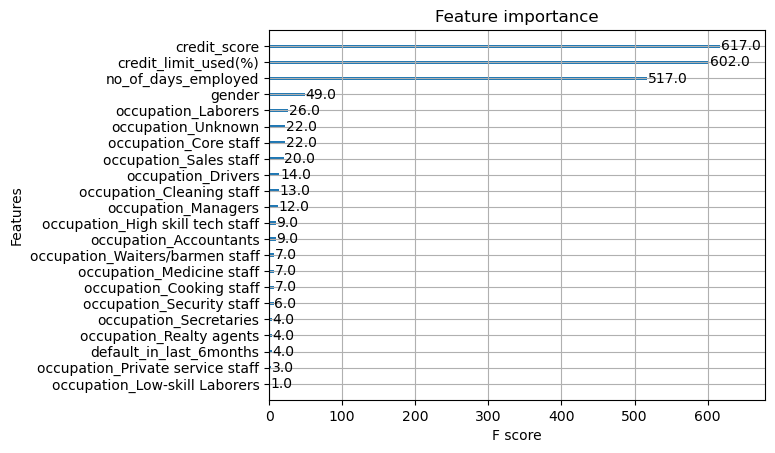

<Figure size 640x480 with 0 Axes>

In [117]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [106]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [107]:
# prediction
evaluation(lgbm_model)

[[18968   308]
 [   35 19241]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.11029259182403
F1_Score of TRAIN data: 99.11024797481507
[[8024  237]
 [  62  677]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.74      0.92      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.67777777777778
F1_Score of TEST data: 90.0412969761847
RMSE:  0.18226964152656422
ROC AUC score:  0.9437069104891351


## KNN

In [108]:
# # iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

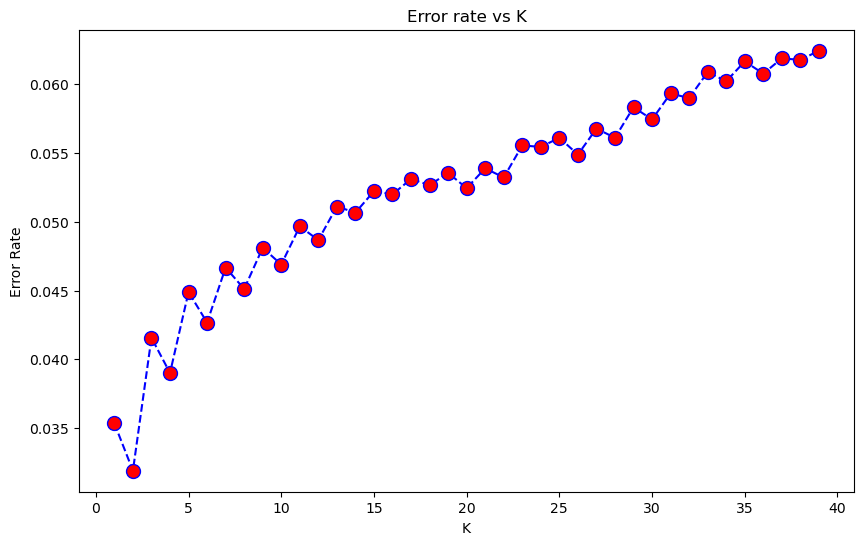

In [109]:
# ploting the error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Choose k = 2

In [110]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [111]:
# # Evaluation
evaluation(knn)

[[19276     0]
 [  243 19033]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.36968250674414
F1_Score of TRAIN data: 99.36965746322619
[[8066  195]
 [  92  647]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.81111111111112
F1_Score of TEST data: 90.04947870709792
RMSE:  0.17857460314638499
ROC AUC score:  0.9259512760203765
